In [1]:
import requests
from bs4 import BeautifulSoup

# Задание 1


Дано: [Сайт Библио-Глобуса](https://www.biblio-globus.ru)

Если сайт Библио-Глобуса помре, то можно [сайт Читай-Города](https://www.chitai-gorod.ru)


Задание: средствами парсинга ответить на список вопросов ниже


1) Какова в среднем длина (в страницах) книги из категории классическая литература в ассортименте магазина?

2) Какое у этих книг распределение цен? (попробуйте нарисовать [гистограмму](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

3) Как соотносятся средние цены книг по Python, Машинному обучению и C++ ? (поясните, как именно вы доставали такие книги :), то есть "я буду доставать книги вот так, потому что...")


# Задание 2 про перевод из camel_case'a в snake_case

Дано произвольное название, написанное в camelCase, перевести его в snake_case

In [1]:
import re
v = 'CamelCaseVar'

#должно превратиться в camel_case_var
print(re.sub(r'(?!^)(?=[A-Z])', '_', v).lower())

camel_case_var


## Задание 3, Про время 

Вовочка подготовил одно очень важное письмо, но везде указал неправильное время. 
Поэтому нужно заменить все вхождения времени на строку (TBD). Время — это строка вида HH:MM:SS или HH:MM, в которой HH — число от 00 до 23, а MM и SS — число от 00 до 59.

Ввод:

    Уважаемые! Если вы к 09:00 не вернёте 
    чемодан, то уже в 09:00:01 я за себя не отвечаю. 
    PS. С отношением 25:50 всё нормально!
    
Вывод:

    Уважаемые! Если вы к (TBD) не вернёте 
    чемодан, то уже в (TBD) я за себя не отвечаю. 
    PS. С отношением 25:50 всё нормально!

In [2]:
inp = """Уважаемые! Если вы к 09:00 не вернёте 
чемодан, то уже в 09:00:01 я за себя не отвечаю. 
PS. С отношением 25:50 всё нормально!"""

sub_str = '(TBD)'

print(re.sub(r'(?<![:\d])([01]\d|2[0-3])(:[0-5]\d){1,2}(?![:\d])', sub_str, inp))

Уважаемые! Если вы к (TBD) не вернёте 
чемодан, то уже в (TBD) я за себя не отвечаю. 
PS. С отношением 25:50 всё нормально!


# Задание 4 Про отчетность 

Владимиру потребовалось срочно запутать финансовую документацию. Но так, чтобы это было обратимо. 
Он не придумал ничего лучше, чем заменить каждое целое число (непрерывную последовательность цифр) на его куб. Помогите ему.

Ввод:

    Было закуплено 12 единиц техники 
    по 410.37 рублей.
    
Вывод:

    Было закуплено 1728 единиц техники 
    по 68921000.50653 рублей.

In [3]:
# Для решения вероятно в функцию sub надо будет пихать другую функцию. Пример "как это делать"

import re

def convert_func(matchobj):
    m =  matchobj.group(0)
    map = {'7': 'seven',
           '8': 'eight',
           '9': 'nine'}
    return map[m]

line = "7 ate 9"
new_line =  re.sub("[7-9]", convert_func, line)

new_line

'seven ate nine'

In [4]:
def our_func(num):
    n =  num.group(0)
    return str(int(n) ** 3)

our_str = '''Было закуплено 12 единиц техники 
по 410.37 рублей.'''

new_line =  re.sub(r"\b\d+\b", our_func, our_str)
print(new_line)

Было закуплено 1728 единиц техники 
по 68921000.50653 рублей.


# Задание 5. Про NumPy и SVD

[Почитать про SVD - 1](http://timbaumann.info/svd-image-compression-demo/)

Сожмите картинку во всех трех каналах с помощью SVD (R,G и B) и оцените, сколько нужно компонент, чтобы получилось вменяемое качество. А сколько мы при этом экономим места?

[Как жать все 3 канала](https://www.kaggle.com/code/paulbacher/practical-applications-to-svd-on-rgb-images/notebook)

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')


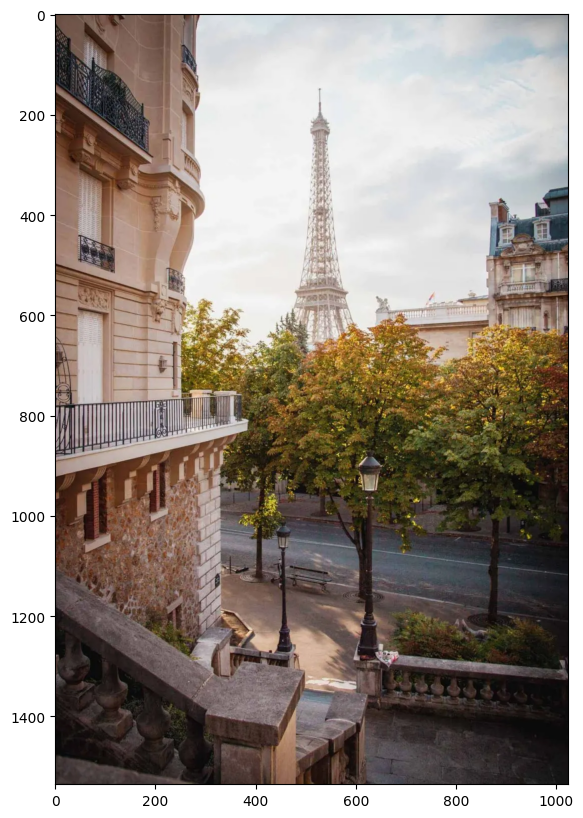

In [2]:
image = Image.open('Avenue-de-Camoens-Paris-Eiffel-Tower.png')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [3]:
def svd_compressor(image, order):
    
    '''
    Функция получает на вход:
    - двумерный массив numpy (один канал цветного изображения в нашем случае)
    - значение order, которое означает, сколько сингулярных значений будет взято для определения итогового массива после разложения
    Возвращает SVD разложение этого массива
    '''
    
    # Результирующий массив размером входного массива 
    compressed = np.zeros(image.shape)
    
    # SVD разложение входного массива
    # U, V - ортогональные матрицы
    # S - диагональная матрица с сингулярными числами
    U, S, V = np.linalg.svd(image)
    
    # В цикле вычисляется результирующий массив исходя из того, 
    # сколько сингулярных значений будет взято
    for i in range(order):
        Ui = U[:, i].reshape(-1, 1)
        Vi = V[i, :].reshape(1, -1)
        Si = S[i]
        compressed += (Ui * Si * Vi)

    return compressed

  0%|          | 0/7 [00:00<?, ?it/s]

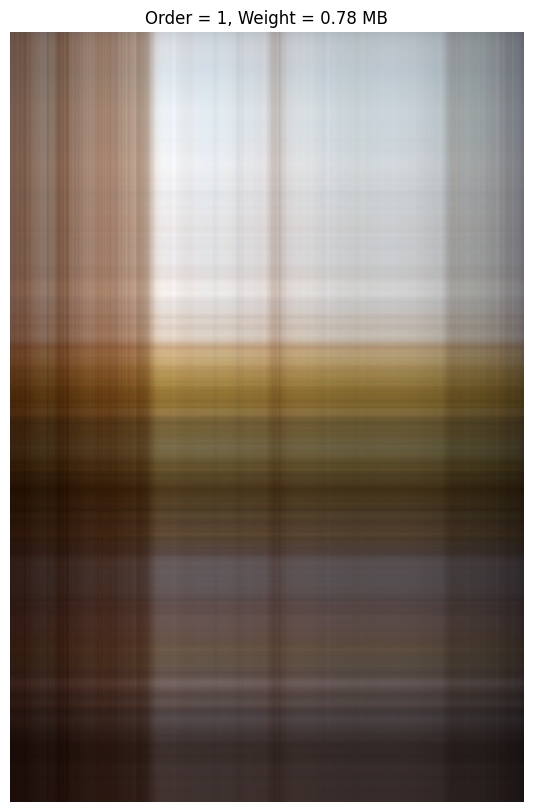

 14%|█▍        | 1/7 [00:03<00:23,  3.86s/it]

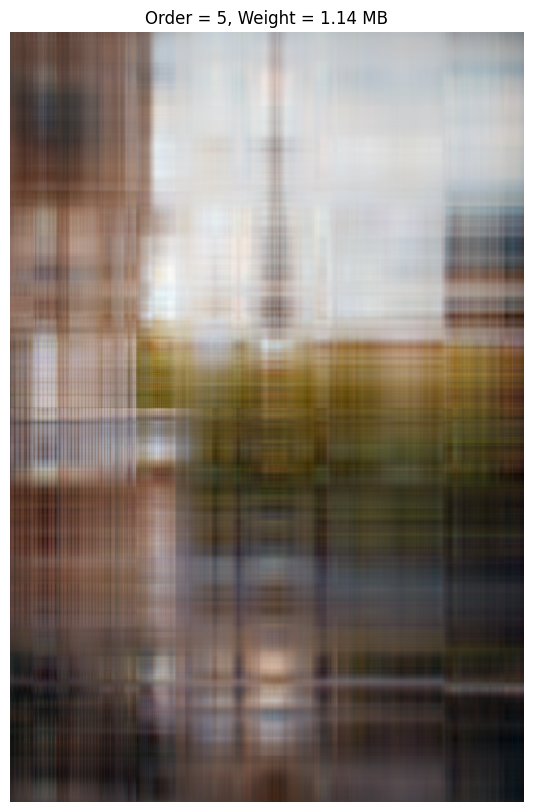

 29%|██▊       | 2/7 [00:07<00:19,  3.92s/it]

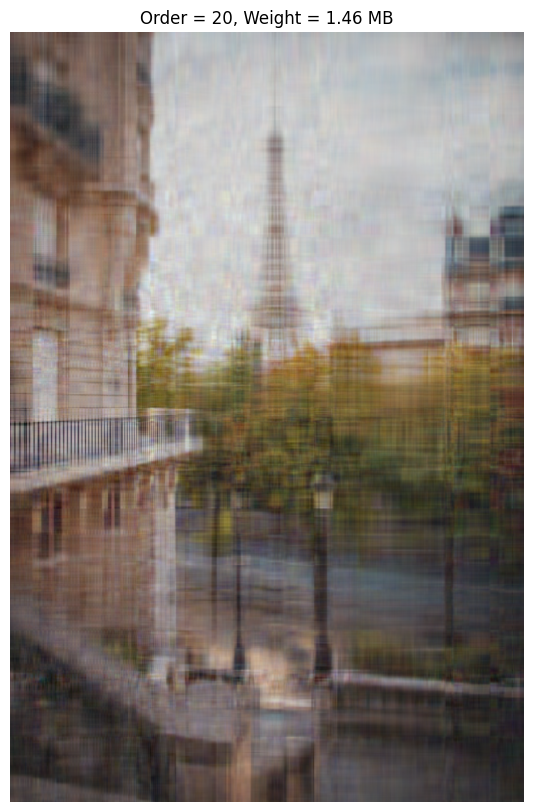

 43%|████▎     | 3/7 [00:12<00:16,  4.06s/it]

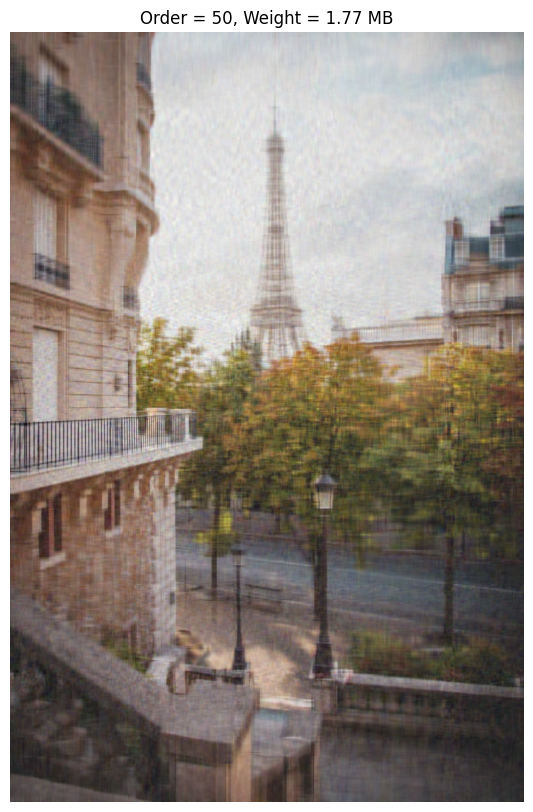

 57%|█████▋    | 4/7 [00:16<00:13,  4.38s/it]

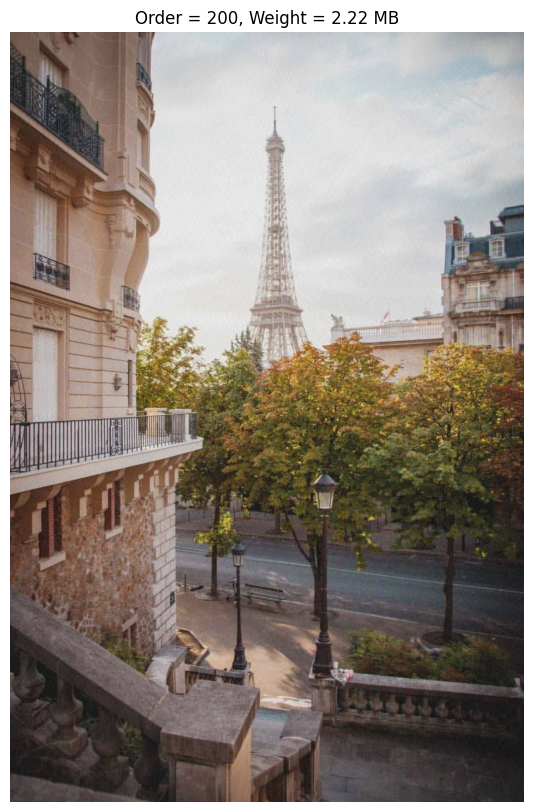

 71%|███████▏  | 5/7 [00:21<00:09,  4.55s/it]

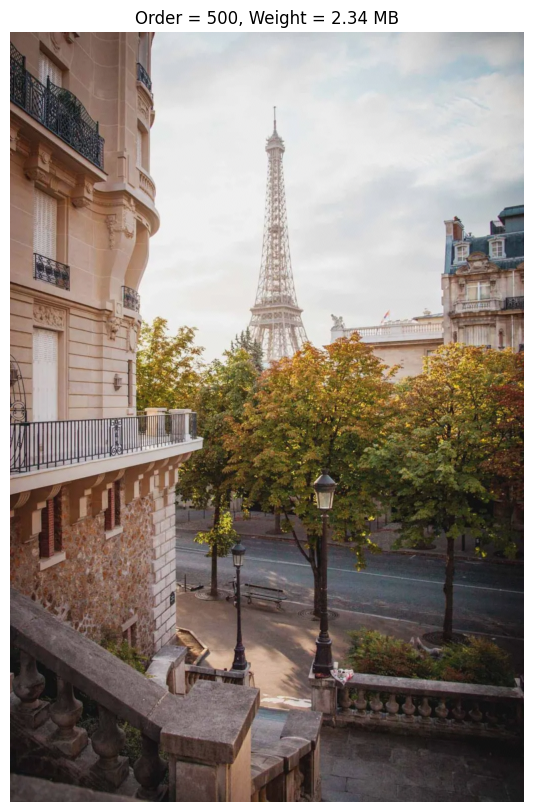

 86%|████████▌ | 6/7 [00:28<00:05,  5.29s/it]

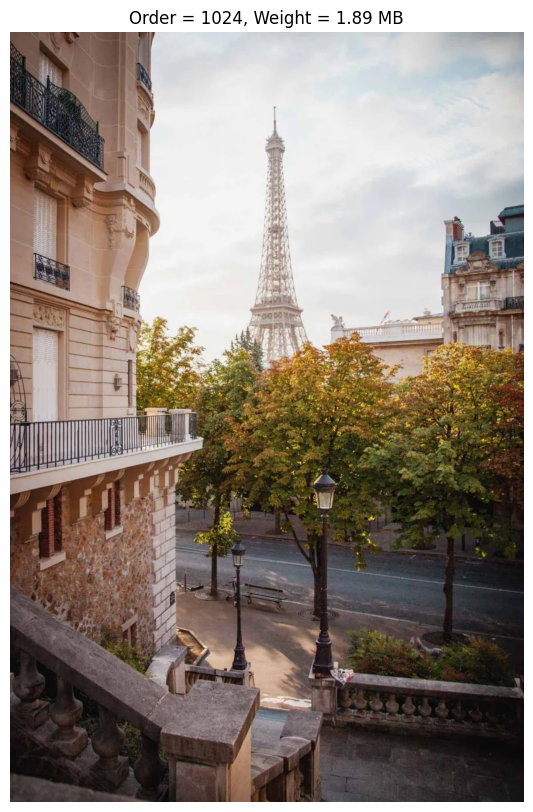

100%|██████████| 7/7 [00:37<00:00,  5.42s/it]


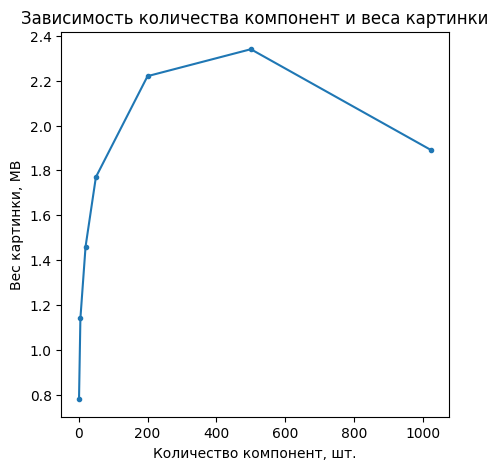

In [5]:
# функция отрабатывает примерно за 40 сек.
def calc_svd_image_orders(image):
    
    '''
    Функция получает исходное изображение
    Возвращает изображения в зависимости от количества сингулярных значений взятых при SVD разложении
    '''

    orders = [1, 5, 20, 50, 200, 500, np.array(image)[:, :, 0].shape[1]]
    weight_images_list = list()
    
    # Три канала исходного массива отдельно по переменным
    red_image = np.array(image)[:, :, 0]
    green_image = np.array(image)[:, :, 1]
    blue_image = np.array(image)[:, :, 2]

    for i in tqdm(range(len(orders))):

        order = orders[i]

        # Сжатие изображения по каналам
        red_comp = svd_compressor(red_image, order)
        green_comp = svd_compressor(green_image, order)
        blue_comp = svd_compressor(blue_image, order)
        
        # Результирующий массив с тремя каналами после SVD разложения
        color_comp = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 3))
        color_comp[:, :, 0] = red_comp
        color_comp[:, :, 1] = green_comp
        color_comp[:, :, 2] = blue_comp

        # нормировка значений массива от 0 до 255
        color_comp_normalize = cv2.normalize(color_comp, 
                                             None, 
                                             alpha = 0, 
                                             beta = 255, 
                                             norm_type = cv2.NORM_MINMAX, 
                                             dtype = cv2.CV_32F
                                             )
        
        color_comp_normalize = np.uint8(color_comp_normalize.astype(int))

        # приведение массива к PIL изображению 
        color_comp_normalize = Image.fromarray(color_comp_normalize)
        img_file = BytesIO()
        color_comp_normalize.save(img_file, 'png')
        
        # вес получившегося изображения в мегабайтах
        img_file_size = round(img_file.tell() / 1048576, 2)

        # добавляю вес изображения в список
        weight_images_list.append(img_file_size)

        # Вывод изображения
        plt.figure(figsize=(10, 10))
        plt.title("Order = {}, Weight = {} MB".format(order, img_file_size))
        plt.axis('off')
        plt.imshow(color_comp_normalize)
        plt.show();

    plt.figure(figsize=(5, 5))
    plt.title('Зависимость количества компонент и веса картинки')
    plt.plot(orders, weight_images_list, '.-')
    plt.xlabel('Количество компонент, шт.')
    plt.ylabel('Вес картинки, MB')

calc_svd_image_orders(image)